### Import Libraries

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

#### Import Data, (set index column to date)

In [12]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col = 'date')


In [13]:
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


#### Clean the data

In [14]:
df = df.loc[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]

In [15]:
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


#### Create a draw_line_plot function

Text(0, 0.5, 'Page Views')

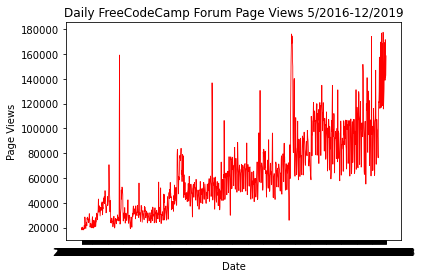

In [19]:
plt.plot(df['value'], color ='red', linewidth = 0.8)
plt.title('Daily FreeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')

#### Create a draw_box_plot function

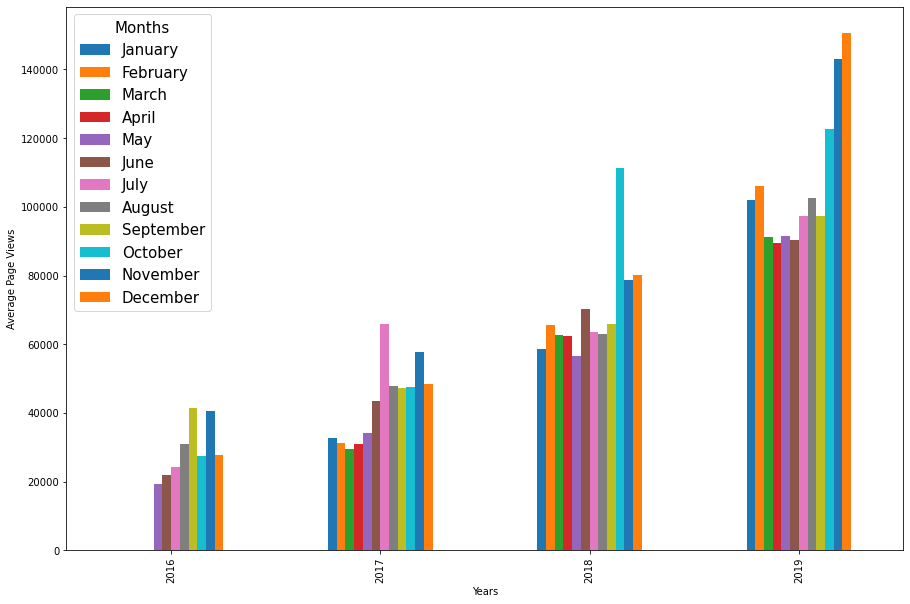

In [29]:
df_bar = df.copy()
df_bar['Year'] = pd.DatetimeIndex(df_bar.index).year
df_bar['Month'] = pd.DatetimeIndex(df_bar.index).month

df_bar = df_bar.groupby(['Year', 'Month',])['value'].mean()
df_bar = df_bar.unstack()

month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

fig = df_bar.plot( kind = 'bar', figsize = (15, 10)).figure

plt.title('')
plt.xlabel('Years')
plt.ylabel('Average Page Views')
lg = plt.legend(title = 'Months', fontsize = 15, labels = month_names)
title = lg.get_title()
title.set_fontsize(15)

#### Create a draw-box-plot with seaborn

Text(0, 0.5, 'Page Views')

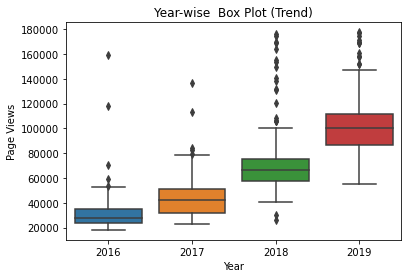

In [34]:
df_box = df.copy()
df_box.reset_index(inplace = True)
df_box['Year'] = pd.DatetimeIndex(df_box['date']).year
df_box['Month'] = pd.DatetimeIndex(df_box['date']).month

plt1 = sns.boxplot(x = 'Year', y = 'value', data = df_box)
plt1.set_title('Year-wise  Box Plot (Trend)')
plt1.set_xlabel('Year')
plt1.set_ylabel('Page Views')

Text(0, 0.5, 'Page Views')

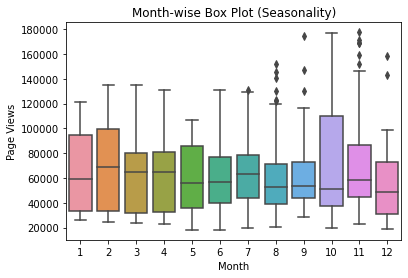

In [37]:
plt2 = sns.boxplot(x = 'Month', y= 'value',data=df_box)                
plt2.set_title('Month-wise Box Plot (Seasonality)')
plt2.set_xlabel('Month')
plt2.set_ylabel('Page Views')
                